In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import statistics
#!pip install scikit-learn -U
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
#!pip install --upgrade scikit-learn
#!pip install --upgrade scikit-learn

In [2]:
#Open file
data1 = pd.read_csv('measurements.csv')
display(data1.shape)
data1

(388, 12)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
5,"8,3","6,4",50,"21,5",10,NaN,E10,0,0,0,NaN,NaN
6,"7,8","4,4",43,"21,5",11,NaN,E10,0,0,0,NaN,NaN
7,"12,3",5,40,"21,5",6,NaN,E10,0,0,0,NaN,NaN
8,"4,9","6,4",26,"21,5",4,NaN,E10,0,0,0,NaN,NaN
9,"11,9","5,3",30,"21,5",9,NaN,E10,0,0,0,NaN,NaN


In [3]:
#checking NaN values
data1.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [4]:
#opening second file:
data2 = pd.read_excel('measurements2.xlsx')
display(data2.shape)
data2.head()

(388, 12)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [5]:
#checking NaN values:
data2.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [6]:
print(data2.describe().T)

               count       mean        std   min    25%   50%   75%    max
distance       388.0  19.652835  22.667837   1.3  11.80  14.6  19.0  216.1
consume        388.0   4.912371   1.033172   3.3   4.30   4.7   5.3   12.2
speed          388.0  41.927835  13.598524  14.0  32.75  40.5  50.0   90.0
temp_inside    376.0  21.929521   1.010455  19.0  21.50  22.0  22.5   25.5
temp_outside   388.0  11.358247   6.991542  -5.0   7.00  10.0  16.0   31.0
AC             388.0   0.077320   0.267443   0.0   0.00   0.0   0.0    1.0
rain           388.0   0.123711   0.329677   0.0   0.00   0.0   0.0    1.0
sun            388.0   0.082474   0.275441   0.0   0.00   0.0   0.0    1.0
refill liters   13.0  37.115385   8.587282  10.0  37.60  38.0  39.0   45.0


In [7]:
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB
None


In [8]:
data2

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN


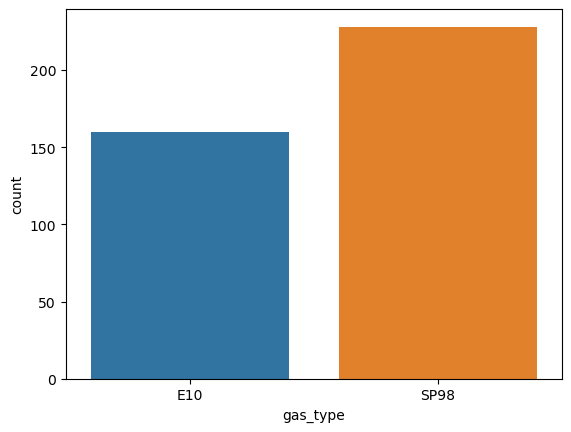

In [9]:
sns.countplot(data = data2, x = "gas_type")
plt.show()

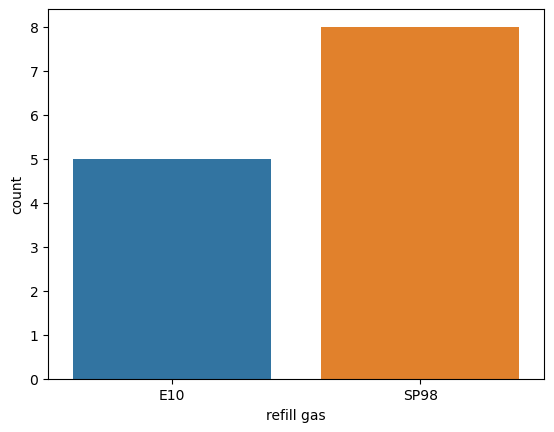

In [10]:
sns.countplot(data = data2, x = "refill gas")
plt.show()

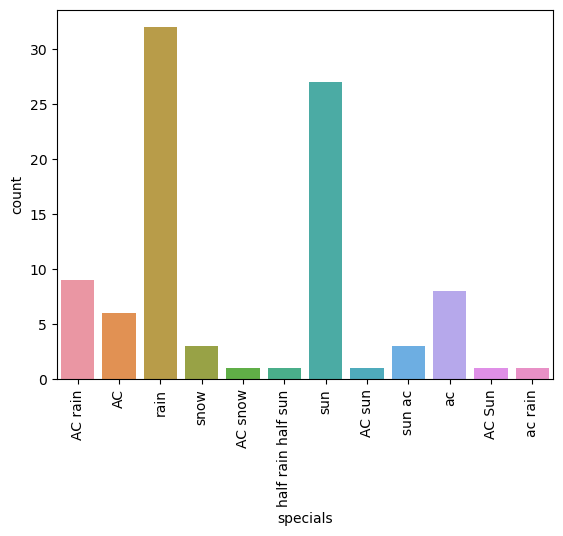

In [11]:
sns.countplot(data = data2, x = "specials")
plt.xticks(rotation=90)
plt.show()

In [12]:
#temp_inside: apply imputer because low number of nulls
#specials: replace nan to other
#refill liters replace nan to 0 because no refill
#refill gas replace nan to notrefill because no refill
impute_it = IterativeImputer()
data2['temp_inside'] = impute_it.fit_transform(data2['temp_inside'].values.reshape(-1,1)).reshape(-1)

In [13]:
data2=data2.drop(columns=['specials','refill liters','refill gas'])

In [14]:
#checking NaN values:
data2.isnull().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

<AxesSubplot:>

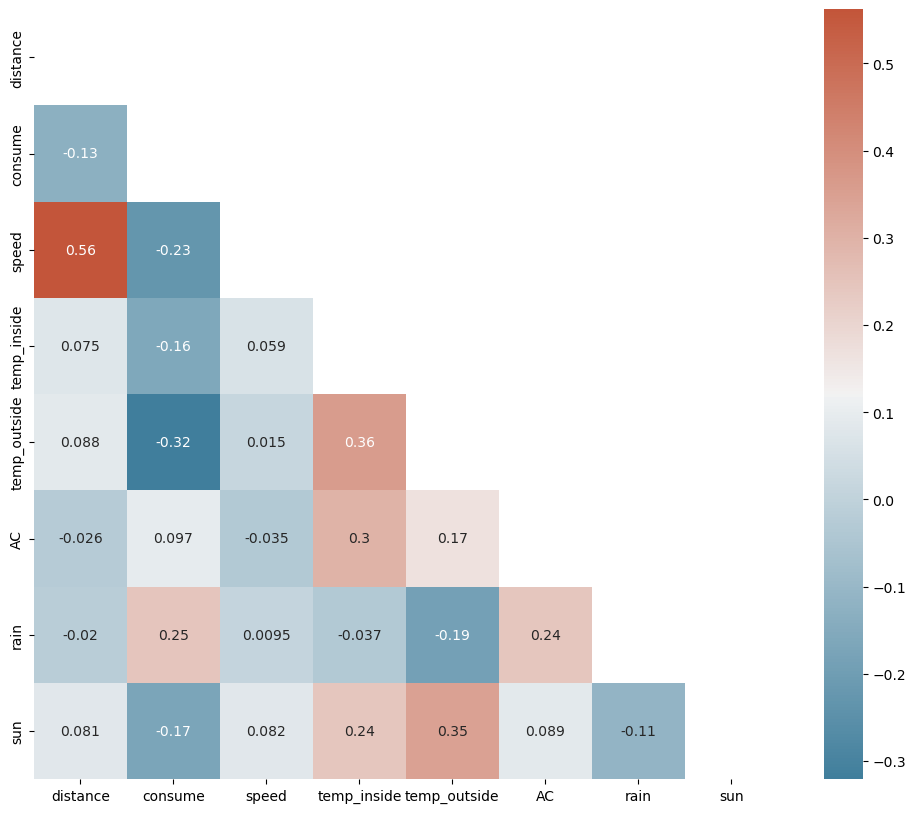

In [15]:
#Correlation & Multi-Collinearity

corr = data2.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap

cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)


In [16]:
data2

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.500000,12,E10,0,0,0
1,12.0,4.2,30,21.500000,13,E10,0,0,0
2,11.2,5.5,38,21.500000,15,E10,0,0,0
3,12.9,3.9,36,21.500000,14,E10,0,0,0
4,18.5,4.5,46,21.500000,15,E10,0,0,0
5,8.3,6.4,50,21.500000,10,E10,0,0,0
6,7.8,4.4,43,21.500000,11,E10,0,0,0
7,12.3,5.0,40,21.500000,6,E10,0,0,0
8,4.9,6.4,26,21.500000,4,E10,0,0,0
9,11.9,5.3,30,21.500000,9,E10,0,0,0


In [17]:
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB
None


In [18]:
#Splitting the dataset with our target netMig = number of emigrants or inmigrants
y=data2['gas_type']
X=data2.drop('gas_type', axis=1)

In [19]:
#splitting in train and test data to focus on train features encoding and scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape) 

(271, 8)

(117, 8)

(271,)

(117,)

In [21]:
y.value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [22]:
#splitting in train and test data to focus on train features encoding and scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=30)

In [23]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape) 

(252, 8)

(136, 8)

(252,)

(136,)

In [24]:
X_train_cat = X_train.select_dtypes(include = object)
X_train_num =X_train.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)
X_test_num =X_test.select_dtypes(include = np.number)

In [25]:
display(X_train_cat.shape)
display(X_train_num.shape)
display(X_test_cat.shape)
display(X_test_num.shape) 

(252, 0)

(252, 8)

(136, 0)

(136, 8)

In [26]:
X_train_cat.shape

(252, 0)

In [27]:
X_test_cat.shape

(136, 0)

In [28]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_train_cat)

cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)
X_train_cat_encode.head()

""
0
1
2
3
4


In [29]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_test_cat)

cols = encoder.get_feature_names_out(input_features=X_test_cat.columns)
X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)
X_test_cat_encode.head()

""
0
1
2
3
4


In [30]:
#Scaling with numerical features

transformer = MinMaxScaler().fit(X_train_num)
X_train_num_norm = transformer.transform(X_train_num)
print(X_train_num_norm.shape)
X_train_num_scale = pd.DataFrame(X_train_num_norm, index = X_train_num.index, columns=X_train_num.columns)
X_train_num_scale.head()
X_train_num_scale.reset_index(drop = True, inplace = True)
X_train_num_scale

(252, 8)


,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
0,0.126807,0.097561,0.305556,0.363636,0.722222,0.0,0.0,0.0
1,0.095926,0.292683,0.416667,0.272727,0.277778,0.0,0.0,0.0
2,0.004599,0.353659,0.055556,0.272727,0.416667,0.0,0.0,0.0
3,0.154402,0.158537,0.541667,0.545455,0.222222,0.0,0.0,0.0
4,0.096583,0.048780,0.388889,0.363636,0.583333,0.0,0.0,0.0
5,0.200394,0.170732,0.597222,0.454545,0.222222,0.0,0.0,0.0
6,0.110381,0.036585,0.277778,0.000000,0.666667,0.0,0.0,0.0
7,0.025624,0.146341,0.319444,0.000000,0.416667,0.0,0.0,0.0
8,0.072273,0.353659,0.625000,0.272727,0.361111,0.0,0.0,0.0
9,0.132063,0.231707,0.486111,0.363636,0.500000,0.0,0.0,0.0


In [31]:
X_test_num_norm = transformer.transform(X_test_num)
print(X_test_num_norm.shape)
X_test_num_scale = pd.DataFrame(X_test_num_norm, index = X_test_num.index, columns=X_test_num.columns)
X_test_num_scale.head()
X_test_num_scale.reset_index(drop = True, inplace=True)
X_test_num_scale

(136, 8)


,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
0,0.068988,0.146341,0.319444,0.454545,0.222222,0.0,0.0,0.0
1,0.068988,0.134146,0.236111,0.454545,0.361111,0.0,0.0,0.0
2,0.153745,0.268293,0.555556,0.909091,0.166667,0.0,0.0,0.0
3,0.101840,0.085366,0.416667,0.272727,0.361111,0.0,0.0,0.0
4,0.094612,0.097561,0.222222,0.454545,0.500000,0.0,0.0,0.0
5,0.096583,0.109756,0.347222,0.363636,0.555556,0.0,0.0,0.0
6,0.092641,0.146341,0.500000,0.363636,0.861111,0.0,0.0,0.0
7,0.068988,0.121951,0.388889,0.272727,0.055556,0.0,0.0,0.0
8,0.068988,0.182927,0.097222,0.272727,0.388889,0.0,0.0,0.0
9,0.096583,0.048780,0.319444,0.818182,0.638889,0.0,0.0,0.0


In [32]:
#Concating numerical and categorical for train and test

X_train = pd.concat([X_train_num_scale,X_train_cat_encode], axis=1)
X_train.index
y_train.reset_index(drop = True, inplace = True)

In [33]:
X_test = pd.concat([X_test_num_scale,X_test_cat_encode], axis=1)
X_test
y_test.reset_index(drop = True, inplace = True)

In [34]:
#making full df for training set for feature selection
data = pd.concat([X_train,y_train],axis = 1)
data.head(10)

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type
0,0.126807,0.097561,0.305556,0.363636,0.722222,0.0,0.0,0.0,SP98
1,0.095926,0.292683,0.416667,0.272727,0.277778,0.0,0.0,0.0,SP98
2,0.004599,0.353659,0.055556,0.272727,0.416667,0.0,0.0,0.0,SP98
3,0.154402,0.158537,0.541667,0.545455,0.222222,0.0,0.0,0.0,SP98
4,0.096583,0.048780,0.388889,0.363636,0.583333,0.0,0.0,0.0,SP98
5,0.200394,0.170732,0.597222,0.454545,0.222222,0.0,0.0,0.0,E10
6,0.110381,0.036585,0.277778,0.000000,0.666667,0.0,0.0,0.0,SP98
7,0.025624,0.146341,0.319444,0.000000,0.416667,0.0,0.0,0.0,SP98
8,0.072273,0.353659,0.625000,0.272727,0.361111,0.0,0.0,0.0,SP98
9,0.132063,0.231707,0.486111,0.363636,0.500000,0.0,0.0,0.0,SP98


In [35]:
X_test.shape

(136, 8)

In [36]:
X_train.shape

(252, 8)

In [37]:
#Running a model with the chosen features.

print("X_train:", X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",y_test.shape)
print("y_test:",y_test.shape)

X_train: (252, 8)
y_train: (252,)
X_test: (136,)
y_test: (136,)


In [38]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf.fit(X_train, y_train)
print('TrainSet = ',clf.score(X_train, y_train))
print('TestSet = ',clf.score(X_test, y_test))

TrainSet =  0.6626984126984127
TestSet =  0.5955882352941176


In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [40]:
#Let´s see the confusion matrix in a clearest way.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]
    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks
    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks
    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks
    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])
    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))
        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""
    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')
    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False
    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    if title:
        plt.title(title)

In [41]:
predictions = clf.predict(X_test)

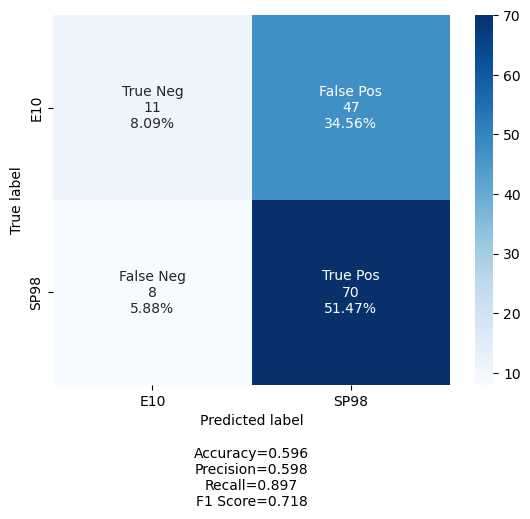

In [42]:
cf_matrix = confusion_matrix(y_test, predictions)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ["E10",'SP98']
make_confusion_matrix(cf_matrix,
                      group_names=labels,
                      categories=categories,
                      cmap=plt.cm.Blues)

In [43]:
pred_RF = clf.predict(X_test)

print('accuracy:', accuracy_score(y_test, pred_RF))
print("precision: ",precision_score(y_test,pred_RF, pos_label="E10"))
print("recall: ",recall_score(y_test,pred_RF, pos_label="E10"))
print("f1: ",f1_score(y_test,pred_RF, pos_label="E10"))

accuracy: 0.5955882352941176
precision:  0.5789473684210527
recall:  0.1896551724137931
f1:  0.2857142857142857


In [44]:
#Checking our predictions:
df=pd.DataFrame({'Actual':y_test, 'Predicted':pred_RF})
df

,Actual,Predicted
0,SP98,SP98
1,E10,SP98
2,SP98,E10
3,E10,SP98
4,SP98,SP98
5,E10,SP98
6,SP98,SP98
7,SP98,SP98
8,E10,SP98
9,SP98,SP98


# hypothesis

In [45]:
# Ho = average consume in E10 fuel is > 6 liters
# H1 = average consume in E10 fuel is < 6 liters

E10 = data2[(data2['gas_type']== 'E10')]['consume']
E10

0       5.0
1       4.2
2       5.5
3       3.9
4       4.5
5       6.4
6       4.4
7       5.0
8       6.4
9       5.3
10      5.6
11      4.6
12      5.9
13      5.1
14      4.7
15      5.1
16      5.6
17      5.1
18      4.9
19      4.7
20      5.5
21      5.9
22      5.7
23      4.7
24      5.9
25      4.1
26      5.7
27      5.8
28      5.5
29      5.7
30      5.3
31      5.0
32      5.6
33      4.8
34      4.3
35      5.7
36      5.2
37      7.4
38      4.8
39      6.5
40      4.0
41      5.0
42      4.6
43      4.3
139     5.4
140     4.3
141     5.4
142     4.3
143     5.2
144     4.1
145     4.4
146     4.5
147    10.8
148     4.7
149     4.8
150     4.0
151     5.0
152     4.6
153     5.0
154     4.3
155     5.2
156     4.7
157     4.2
158     5.3
159     5.3
160     8.1
161     4.8
162     5.1
163     4.4
164     5.0
165     6.3
166     4.8
167     6.1
168     4.6
169     4.8
170     4.7
171     4.8
172     4.4
173     4.9
174     4.9
175     4.4
176     5.3
177     5.3
178 

In [46]:
from scipy import stats
from scipy.stats import ttest_1samp

stat,pvalue = stats.ttest_1samp(E10,6)
print('Stat_Score =  ',stat)
print('Pvalue =  ',pvalue)

Stat_Score =   -15.004880514674818
Pvalue =   2.8725297057731383e-32


In [47]:
con_level = 0.95
df = len(E10)-1
mu = E10.mean()
se = stats.sem(E10)

conf_int = stats.t.interval(con_level,df,mu,se)
print('Confidence interval is between', conf_int)

Confidence interval is between (4.79057729018914, 5.071922709810862)


In [48]:
#The p-value is below our threshhold of .05 and the Stat_Score is negative, so we can reject the null (Ho).
#Therefore it is more likely that the average consume is less than 6 liters. Again, let's check!

In [49]:
E10.mean()

4.931250000000001